In [1]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.autograd import Variable
from PIL import Image

# Load the pretrained model
model = models.resnet18(pretrained=True)

# Use the model object to select the desired layer
layer = model._modules.get('avgpool')

# Set model to evaluation mode
model.eval()

# Image transforms
scaler = transforms.Resize((224, 224))
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
to_tensor = transforms.ToTensor()

def get_vector(image_name):
    # 1. Load the image with Pillow library
    img = Image.open(image_name)
    # 2. Create a PyTorch Variable with the transformed image
    t_img = Variable(normalize(to_tensor(scaler(img))).unsqueeze(0))
    # 3. Create a vector of zeros that will hold our feature vector
    #    The 'avgpool' layer has an output size of 512
    my_embedding = torch.zeros(512)
    # 4. Define a function that will copy the output of a layer
    def copy_data(m, i, o):
        my_embedding.copy_(o.data.reshape(o.data.size(1)))
    # 5. Attach that function to our selected layer
    h = layer.register_forward_hook(copy_data)
    # 6. Run the model on our transformed image
    model(t_img)
    # 7. Detach our copy function from the layer
    h.remove()
    # 8. Return the feature vector
    return my_embedding.numpy()

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from matplotlib import cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from torchvision import transforms

In [58]:
image_feature = np.array([get_vector(image_name="D:\python files\CNN\CNN_Fruit_Class/train\Apple/0_100.jpg")])
fruit_name = ["Apple", 'Banana', 'Orange']
for f in fruit_name:
    for i in range(200, 250):
        image_feature = np.append(image_feature, np.array([get_vector(image_name="D:\python files\CNN\CNN_Fruit_Class/train/"+f+"/"+str(i)+"_100.jpg")]), axis=0)
print(image_feature.shape)

(151, 512)


In [84]:
indices = test_predictions==2
indices[100:150]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

(151, 512)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 151 samples in 0.000s...
[t-SNE] Computed neighbors for 151 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 151 / 151
[t-SNE] Mean sigma: 3.114948
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.272369
[t-SNE] KL divergence after 1000 iterations: 0.032955
(151,)


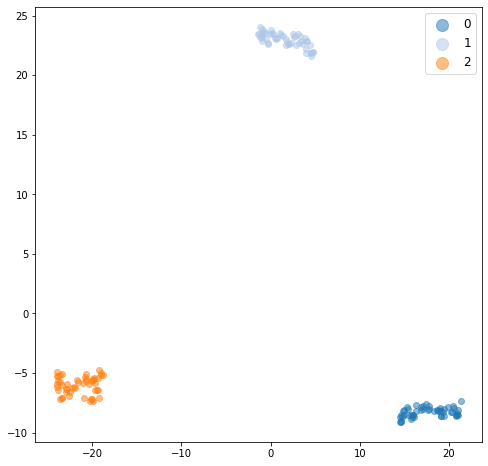

In [89]:
#Create a two dimensional t-SNE projection of the embeddings
#image_feature.resize(1, 512)
print(image_feature.shape)
tsne = TSNE(2, verbose=1)
tsne_proj = tsne.fit_transform(image_feature)
#Plot those points as a scatter plot and label them based on the pred labels
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(8,8))

num_categories = 3
test_predictions = [0]
test_predictions = test_predictions+ [x//50 for x in range(150)]
test_predictions = np.array(test_predictions)

for lab in range(num_categories):
    indices = test_predictions==lab
    ax.scatter(tsne_proj[indices,0],tsne_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = lab ,alpha=0.5)
# for i in range(151):
#     ax.scatter(tsne_proj[i,0],tsne_proj[i,1])
ax.legend(fontsize='large', markerscale=2)
#plt.xlim[-30,30]
#plt.ylim[-30,30]
plt.show()

In [95]:
def dist(x,y):   
    return np.sqrt(np.sum((x-y)**2))

print('이미지 Apple과 이미지 Banana의 유사도 :',dist(image_feature[0], image_feature[70]))
print('이미지 Apple과 이미지 Orange의 유사도 :',dist(image_feature[0], image_feature[120]))
print('이미지 Banana과 이미지 Orange의 유사도 :',dist(image_feature[70], image_feature[120]))

for i in range(0,51,3):
    print(f"이미지 0과 이미지{i}의 유사도: ", dist(image_feature[0], image_feature[i]))
for i in range(51,101,3):
    print(f"이미지 51과 이미지{i}의 유사도: ", dist(image_feature[51], image_feature[i]))
for i in range(101,151,3):
    print(f"이미지 101과 이미지{i}의 유사도: ", dist(image_feature[101], image_feature[i]))

이미지 Apple과 이미지 Banana의 유사도 : 24.97896
이미지 Apple과 이미지 Orange의 유사도 : 14.124025
이미지 Banana과 이미지 Orange의 유사도 : 23.62491
이미지 0과 이미지0의 유사도:  0.0
이미지 0과 이미지3의 유사도:  8.933057
이미지 0과 이미지6의 유사도:  9.452997
이미지 0과 이미지9의 유사도:  8.844806
이미지 0과 이미지12의 유사도:  9.390461
이미지 0과 이미지15의 유사도:  8.515563
이미지 0과 이미지18의 유사도:  8.060381
이미지 0과 이미지21의 유사도:  9.663267
이미지 0과 이미지24의 유사도:  9.8217535
이미지 0과 이미지27의 유사도:  9.437764
이미지 0과 이미지30의 유사도:  8.668101
이미지 0과 이미지33의 유사도:  8.575254
이미지 0과 이미지36의 유사도:  8.601712
이미지 0과 이미지39의 유사도:  8.111301
이미지 0과 이미지42의 유사도:  6.89789
이미지 0과 이미지45의 유사도:  7.7649775
이미지 0과 이미지48의 유사도:  6.391959
이미지 51과 이미지51의 유사도:  0.0
이미지 51과 이미지54의 유사도:  4.323801
이미지 51과 이미지57의 유사도:  6.2583613
이미지 51과 이미지60의 유사도:  7.0508337
이미지 51과 이미지63의 유사도:  7.126091
이미지 51과 이미지66의 유사도:  7.2546396
이미지 51과 이미지69의 유사도:  8.405846
이미지 51과 이미지72의 유사도:  9.008657
이미지 51과 이미지75의 유사도:  9.02006
이미지 51과 이미지78의 유사도:  9.209371
이미지 51과 이미지81의 유사도:  8.922848
이미지 51과 이미지84의 유사도:  9.827128
이미지 51과 이미지87의 유사도:  10.099656
이미지 51과 이미지

In [96]:
for i in range(0,151,3):
    print(f"이미지 0과 이미지{i}의 유사도: ", dist(image_feature[0], image_feature[i]))

이미지 0과 이미지0의 유사도:  0.0
이미지 0과 이미지3의 유사도:  8.933057
이미지 0과 이미지6의 유사도:  9.452997
이미지 0과 이미지9의 유사도:  8.844806
이미지 0과 이미지12의 유사도:  9.390461
이미지 0과 이미지15의 유사도:  8.515563
이미지 0과 이미지18의 유사도:  8.060381
이미지 0과 이미지21의 유사도:  9.663267
이미지 0과 이미지24의 유사도:  9.8217535
이미지 0과 이미지27의 유사도:  9.437764
이미지 0과 이미지30의 유사도:  8.668101
이미지 0과 이미지33의 유사도:  8.575254
이미지 0과 이미지36의 유사도:  8.601712
이미지 0과 이미지39의 유사도:  8.111301
이미지 0과 이미지42의 유사도:  6.89789
이미지 0과 이미지45의 유사도:  7.7649775
이미지 0과 이미지48의 유사도:  6.391959
이미지 0과 이미지51의 유사도:  23.131495
이미지 0과 이미지54의 유사도:  23.440649
이미지 0과 이미지57의 유사도:  24.813145
이미지 0과 이미지60의 유사도:  25.14465
이미지 0과 이미지63의 유사도:  24.637486
이미지 0과 이미지66의 유사도:  23.960596
이미지 0과 이미지69의 유사도:  24.049171
이미지 0과 이미지72의 유사도:  24.488514
이미지 0과 이미지75의 유사도:  24.509539
이미지 0과 이미지78의 유사도:  24.3452
이미지 0과 이미지81의 유사도:  24.129282
이미지 0과 이미지84의 유사도:  23.935518
이미지 0과 이미지87의 유사도:  23.746853
이미지 0과 이미지90의 유사도:  23.493929
이미지 0과 이미지93의 유사도:  23.465174
이미지 0과 이미지96의 유사도:  23.656588
이미지 0과 이미지99의 유사도:  23.279545
이미지 0과 이

In [94]:
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

print('이미지 Apple과 이미지 Banana의 유사도 :',cos_sim(image_feature[0], image_feature[70]))
print('이미지 Apple과 이미지 Orange의 유사도 :',cos_sim(image_feature[0], image_feature[120]))
print('이미지 Banana과 이미지 Orange의 유사도 :',cos_sim(image_feature[70], image_feature[120]))

for i in range(0,51,3):
    print(f"이미지 0과 이미지{i}의 유사도: ", cos_sim(image_feature[0], image_feature[i]))
for i in range(51,101,3):
    print(f"이미지 51과 이미지{i}의 유사도: ", cos_sim(image_feature[51], image_feature[i]))
for i in range(101,151,3):
    print(f"이미지 101과 이미지{i}의 유사도: ", cos_sim(image_feature[101], image_feature[i]))

이미지 Apple과 이미지 Banana의 유사도 : 0.58199346
이미지 Apple과 이미지 Orange의 유사도 : 0.8360955
이미지 Banana과 이미지 Orange의 유사도 : 0.62526345
이미지 0과 이미지0의 유사도:  1.0
이미지 0과 이미지3의 유사도:  0.9328306
이미지 0과 이미지6의 유사도:  0.9247097
이미지 0과 이미지9의 유사도:  0.9346431
이미지 0과 이미지12의 유사도:  0.9281582
이미지 0과 이미지15의 유사도:  0.93919414
이미지 0과 이미지18의 유사도:  0.9458791
이미지 0과 이미지21의 유사도:  0.9209718
이미지 0과 이미지24의 유사도:  0.91952854
이미지 0과 이미지27의 유사도:  0.9254374
이미지 0과 이미지30의 유사도:  0.93706554
이미지 0과 이미지33의 유사도:  0.9382729
이미지 0과 이미지36의 유사도:  0.93817073
이미지 0과 이미지39의 유사도:  0.94522434
이미지 0과 이미지42의 유사도:  0.9606841
이미지 0과 이미지45의 유사도:  0.95001465
이미지 0과 이미지48의 유사도:  0.9662134
이미지 51과 이미지51의 유사도:  1.0000001
이미지 51과 이미지54의 유사도:  0.98861533
이미지 51과 이미지57의 유사도:  0.97767603
이미지 51과 이미지60의 유사도:  0.97181624
이미지 51과 이미지63의 유사도:  0.9696083
이미지 51과 이미지66의 유사도:  0.9676105
이미지 51과 이미지69의 유사도:  0.9567154
이미지 51과 이미지72의 유사도:  0.9502097
이미지 51과 이미지75의 유사도:  0.9499401
이미지 51과 이미지78의 유사도:  0.94746137
이미지 51과 이미지81의 유사도:  0.9505641
이미지 51과 이미지84의 유사도:  0.939702

In [97]:
for i in range(0,151,3):
    print(f"이미지 0과 이미지{i}의 유사도: ", cos_sim(image_feature[0], image_feature[i]))

이미지 0과 이미지0의 유사도:  1.0
이미지 0과 이미지3의 유사도:  0.9328306
이미지 0과 이미지6의 유사도:  0.9247097
이미지 0과 이미지9의 유사도:  0.9346431
이미지 0과 이미지12의 유사도:  0.9281582
이미지 0과 이미지15의 유사도:  0.93919414
이미지 0과 이미지18의 유사도:  0.9458791
이미지 0과 이미지21의 유사도:  0.9209718
이미지 0과 이미지24의 유사도:  0.91952854
이미지 0과 이미지27의 유사도:  0.9254374
이미지 0과 이미지30의 유사도:  0.93706554
이미지 0과 이미지33의 유사도:  0.9382729
이미지 0과 이미지36의 유사도:  0.93817073
이미지 0과 이미지39의 유사도:  0.94522434
이미지 0과 이미지42의 유사도:  0.9606841
이미지 0과 이미지45의 유사도:  0.95001465
이미지 0과 이미지48의 유사도:  0.9662134
이미지 0과 이미지51의 유사도:  0.63534784
이미지 0과 이미지54의 유사도:  0.620083
이미지 0과 이미지57의 유사도:  0.5990733
이미지 0과 이미지60의 유사도:  0.59074146
이미지 0과 이미지63의 유사도:  0.5906803
이미지 0과 이미지66의 유사도:  0.59204453
이미지 0과 이미지69의 유사도:  0.59743047
이미지 0과 이미지72의 유사도:  0.58128875
이미지 0과 이미지75의 유사도:  0.5780913
이미지 0과 이미지78의 유사도:  0.576604
이미지 0과 이미지81의 유사도:  0.5747493
이미지 0과 이미지84의 유사도:  0.5767736
이미지 0과 이미지87의 유사도:  0.57481974
이미지 0과 이미지90의 유사도:  0.5800117
이미지 0과 이미지93의 유사도:  0.57642114
이미지 0과 이미지96의 유사도:  0.5750751
이미지 0과 이미